In [1]:
import numpy as np
from scipy import sparse as sp
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt
from matplotlib.ticker import IndexLocator
import time, sys
import pickle
from scipy.stats import qmc

In [2]:
# Given parameters
nx = 60
ny = 60
tf = 1.0
dt = 2.0e-3
nt = int(tf/dt)
xmin = 0; xmax = 1
ymin = 0; ymax = 1
dims=(nx,ny)

# POD basis
num_basis=np.array([3,4,5,6])
print('num_basis {}'.format(num_basis))

# parameters
p_inter=5
FOM_parameters = np.arange(75,125+1,1,dtype=int)
print("Prediction Parameters: {}".format(FOM_parameters))
print("training parameters={}".format(FOM_parameters[p_inter:-p_inter:p_inter]))

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

# file path
file_path_gappy_uniform_result = "../__result/ex16_diffusion/ex16_POD_bndry_uniform_gappy_result.p"
file_name_SVD="../__model/ex16_diffusion/ex16_SVD.p"

# full, inner, bc index
multi_index_i,multi_index_j=np.meshgrid(np.arange(nx),np.arange(ny),indexing='xy')
full_multi_index=(multi_index_j.flatten(),multi_index_i.flatten())
x0_multi_index=(multi_index_j[:,0].flatten(),multi_index_i[:,0].flatten())
x1_multi_index=(multi_index_j[:,-1].flatten(),multi_index_i[:,-1].flatten())
y0_multi_index=(multi_index_j[0,:].flatten(),multi_index_i[0,:].flatten())
y1_multi_index=(multi_index_j[-1,:].flatten(),multi_index_i[-1,:].flatten())

dims=(ny,nx)
full_raveled_indicies=np.ravel_multi_index(full_multi_index,dims)
x0_raveled_indicies=np.ravel_multi_index(x0_multi_index,dims)
x1_raveled_indicies=np.ravel_multi_index(x1_multi_index,dims)
y0_raveled_indicies=np.ravel_multi_index(y0_multi_index,dims)
y1_raveled_indicies=np.ravel_multi_index(y1_multi_index,dims)
bc_raveled_indicies=np.unique(np.concatenate((x0_raveled_indicies,x1_raveled_indicies,
                                              y0_raveled_indicies,y1_raveled_indicies)))
inner_raveled_indicies=np.setdiff1d(full_raveled_indicies,bc_raveled_indicies)

num_basis [3 4 5 6]
Prediction Parameters: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]
training parameters=[ 80  85  90  95 100 105 110 115 120]


# gappyPOD

# of measurments: 12
[   0   20   40   59 1200 1259 2400 2459 3540 3560 3580 3599]


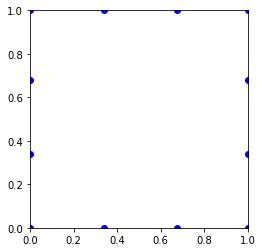

In [3]:
# equally spaced on bc
inter=20
x0_inter_multi_index=(multi_index_j[::inter,0].flatten(),multi_index_i[::inter,0].flatten())
x1_inter_multi_index=(multi_index_j[::inter,-1].flatten(),multi_index_i[::inter,-1].flatten())
y0_inter_multi_index=(multi_index_j[0,::inter].flatten(),multi_index_i[0,::inter].flatten())
y1_inter_multi_index=(multi_index_j[-1,::inter].flatten(),multi_index_i[-1,::inter].flatten())
x0_inter_raveled_indicies=np.ravel_multi_index(x0_inter_multi_index,dims)
x1_inter_raveled_indicies=np.ravel_multi_index(x1_inter_multi_index,dims)
y0_inter_raveled_indicies=np.ravel_multi_index(y0_inter_multi_index,dims)
y1_inter_raveled_indicies=np.ravel_multi_index(y1_inter_multi_index,dims)
msmt_idx=np.unique(np.concatenate((x0_inter_raveled_indicies,
                                   x1_inter_raveled_indicies,
                                   y0_inter_raveled_indicies,
                                   y1_inter_raveled_indicies,
                                  np.array([nx*ny-1]))))

print("# of measurments: {}".format(len(msmt_idx)))
print(msmt_idx)

# plot measuremnt positions
plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
plt.axis('square')
plt.axis([xmin,xmax,ymin,ymax])
plt.savefig("../__result/ex16_diffusion/ex16_POD_bndry_uniform_{}_samples.png".format(len(msmt_idx)))

# of POD basis is 3
# of measurments: 12
[   0   20   40   59 1200 1259 2400 2459 3540 3560 3580 3599]


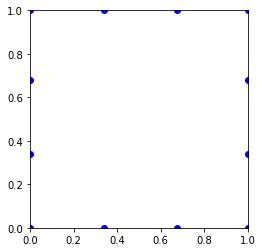

Param is 75
Time elapsed: 2.2920680046081543 sec
average relative error of u: 9.679441701792529%
maximum relative error of u: 10.66576728463834%

Param is 76
Time elapsed: 2.0961391925811768 sec
average relative error of u: 9.77843581676647%
maximum relative error of u: 10.778803054956073%

Param is 77
Time elapsed: 1.9557015895843506 sec
average relative error of u: 9.873768992157618%
maximum relative error of u: 10.889766445819577%

Param is 78
Time elapsed: 2.10343074798584 sec
average relative error of u: 9.96570094018238%
maximum relative error of u: 10.998988725691651%

Param is 79
Time elapsed: 2.3919222354888916 sec
average relative error of u: 10.054413396208723%
maximum relative error of u: 11.106694148241782%

Param is 80
Time elapsed: 2.1087539196014404 sec
average relative error of u: 10.140306410573947%
maximum relative error of u: 11.21322096615486%

Param is 81
Time elapsed: 2.1294240951538086 sec
average relative error of u: 10.223621520514088%
maximum relative error o

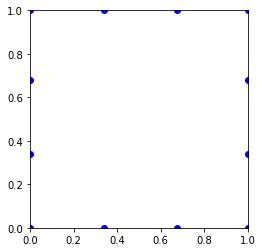

Param is 75
Time elapsed: 2.089505672454834 sec
average relative error of u: 9.301469134945311%
maximum relative error of u: 10.382641795214695%

Param is 76
Time elapsed: 2.243976354598999 sec
average relative error of u: 9.322538846057771%
maximum relative error of u: 10.40246710196701%

Param is 77
Time elapsed: 1.8591320514678955 sec
average relative error of u: 9.33214093210676%
maximum relative error of u: 10.408821926894179%

Param is 78
Time elapsed: 1.7989552021026611 sec
average relative error of u: 9.330238342157653%
maximum relative error of u: 10.401552771388962%

Param is 79
Time elapsed: 2.0054049491882324 sec
average relative error of u: 9.316731425312193%
maximum relative error of u: 10.380472491967522%

Param is 80
Time elapsed: 1.9813036918640137 sec
average relative error of u: 9.291767626603228%
maximum relative error of u: 10.345595640201648%

Param is 81
Time elapsed: 2.5716757774353027 sec
average relative error of u: 9.255376956230872%
maximum relative error of

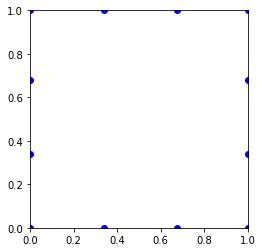

Param is 75
Time elapsed: 2.2819712162017822 sec
average relative error of u: 6.600820960648029%
maximum relative error of u: 9.312102413943418%

Param is 76
Time elapsed: 2.5722897052764893 sec
average relative error of u: 6.806004095933941%
maximum relative error of u: 9.663014276091952%

Param is 77
Time elapsed: 2.4976465702056885 sec
average relative error of u: 7.034878421374441%
maximum relative error of u: 9.994993168274716%

Param is 78
Time elapsed: 2.4437170028686523 sec
average relative error of u: 7.280597440183172%
maximum relative error of u: 10.305952747260996%

Param is 79
Time elapsed: 2.2624258995056152 sec
average relative error of u: 7.536201363420764%
maximum relative error of u: 10.592890108455165%

Param is 80
Time elapsed: 2.217428207397461 sec
average relative error of u: 7.795962413805249%
maximum relative error of u: 10.852663436520292%

Param is 81
Time elapsed: 1.8994550704956055 sec
average relative error of u: 8.053955251531661%
maximum relative error of

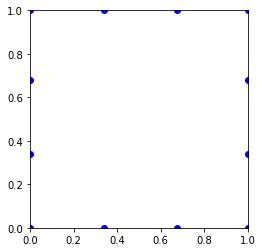

Param is 75
Time elapsed: 2.0518603324890137 sec
average relative error of u: 22.369611416452695%
maximum relative error of u: 35.72718772787481%

Param is 76
Time elapsed: 2.056422710418701 sec
average relative error of u: 20.23793572600901%
maximum relative error of u: 32.99200549317381%

Param is 77
Time elapsed: 2.042811632156372 sec
average relative error of u: 18.048452446254945%
maximum relative error of u: 30.025204083298%

Param is 78
Time elapsed: 2.0605711936950684 sec
average relative error of u: 15.868674785671038%
maximum relative error of u: 26.84082121451516%

Param is 79
Time elapsed: 1.9640722274780273 sec
average relative error of u: 13.808011305807455%
maximum relative error of u: 23.461815156481038%

Param is 80
Time elapsed: 2.128974199295044 sec
average relative error of u: 12.039699025075734%
maximum relative error of u: 19.916310801508345%

Param is 81
Time elapsed: 2.100372314453125 sec
average relative error of u: 10.817857448217858%
maximum relative error of

In [4]:
solution=np.zeros((len(num_basis),len(FOM_parameters),nt+1,nx*ny))
avg_rel_err=np.zeros((len(num_basis),len(FOM_parameters)))
rel_err=np.zeros((len(num_basis),len(FOM_parameters),nt+1))
elapsed_time=np.zeros((len(num_basis),len(FOM_parameters)))

with open(file=file_name_SVD, mode='rb') as ff:  
    SVD = pickle.load(ff)

for ii in range(len(num_basis)):
    POD_basis=num_basis[ii]
    print("# of POD basis is {}".format(POD_basis))

    # equally spaced on bc
    inter=20
    x0_inter_multi_index=(multi_index_j[::inter,0].flatten(),multi_index_i[::inter,0].flatten())
    x1_inter_multi_index=(multi_index_j[::inter,-1].flatten(),multi_index_i[::inter,-1].flatten())
    y0_inter_multi_index=(multi_index_j[0,::inter].flatten(),multi_index_i[0,::inter].flatten())
    y1_inter_multi_index=(multi_index_j[-1,::inter].flatten(),multi_index_i[-1,::inter].flatten())
    x0_inter_raveled_indicies=np.ravel_multi_index(x0_inter_multi_index,dims)
    x1_inter_raveled_indicies=np.ravel_multi_index(x1_inter_multi_index,dims)
    y0_inter_raveled_indicies=np.ravel_multi_index(y0_inter_multi_index,dims)
    y1_inter_raveled_indicies=np.ravel_multi_index(y1_inter_multi_index,dims)
    msmt_idx=np.unique(np.concatenate((x0_inter_raveled_indicies,
                                       x1_inter_raveled_indicies,
                                       y0_inter_raveled_indicies,
                                       y1_inter_raveled_indicies,
                                      np.array([nx*ny-1]))))

    print("# of measurments: {}".format(len(msmt_idx)))
    print(msmt_idx)

    # plot measuremnt positions
    plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
    plt.axis('square')
    plt.axis([xmin,xmax,ymin,ymax])
    plt.show()
    
    # Basis matrix
    phi_u = SVD['U'][:,:POD_basis]

    phim_u=phi_u[msmt_idx]
    phim_u_pinv=np.linalg.pinv(phim_u)
    
    for jj in range(len(FOM_parameters)):
        FOM_parameter=FOM_parameters[jj]
        print("Param is {}".format(FOM_parameter))
        
        # Load FOM solution
        ex = np.load('../__data/ex16_diffusion/ex16_interp_{}.npz'.format(FOM_parameter), allow_pickle = True)
        ex = ex.f.arr_0
        u_full = ex.reshape(nt+1,-1)

        # take measurments
        um = u_full[:,msmt_idx]

        # Initial condition
        u0=u_full[0]
        u_ref = u0

        # Gappy POD
        t_start_gappyPOD=time.time()

        # solution
        u_gappyPOD=np.zeros((nt+1,ny*nx))
        u_hat=np.zeros((nt+1,POD_basis))

        # IC
        u_hat0=np.zeros(POD_basis)
        u_gappyPOD[0]=np.copy(u0)

        for n in range(nt):
            u_hat[n+1] = phim_u_pinv.dot(um[n+1]-u_ref[msmt_idx])
            u_gappyPOD[n+1] = u_ref + phi_u.dot(u_hat[n+1])

        # elapsed time
        t_elapsed_gappyPOD=time.time()-t_start_gappyPOD
        print('Time elapsed: {} sec'.format(t_elapsed_gappyPOD))

        # error
        u_rel_err_gappyPOD=np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)/np.linalg.norm(u_full,ord=2,axis=1)*100
        u_avg_rel_err=np.sqrt(np.sum(np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)**2))/np.sqrt(np.sum(np.linalg.norm(u_full,ord=2,axis=1)**2))*100
        print("average relative error of u: {}%".format(u_avg_rel_err))
        print("maximum relative error of u: {}%".format(np.max(u_rel_err_gappyPOD)))
        print()

        # save result
        solution[ii,jj]=u_gappyPOD
        avg_rel_err[ii,jj]=u_avg_rel_err
        rel_err[ii,jj]=u_rel_err_gappyPOD
        elapsed_time[ii,jj]=t_elapsed_gappyPOD
    
results={'solution':solution,'avg_rel_err':avg_rel_err,'rel_err':rel_err,'elapsed_time':elapsed_time}
with open(file=file_path_gappy_uniform_result, mode='wb') as ff:
    pickle.dump(results, ff)

In [5]:
print(num_basis)
idx=[0,1,2,3]
num_basis[idx]

[3 4 5 6]


array([3, 4, 5, 6])

Text(0.5, 1.0, 'Max. Rel. Err. vs Parameters')

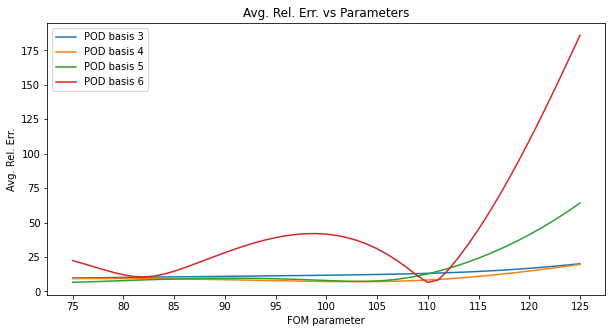

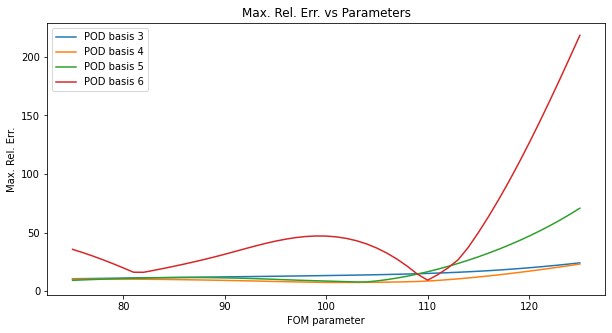

In [6]:
# with open(file=file_path_gappy_uniform_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:   
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex16_diffusion/ex16_POD_uniform_avg_rel_err.png")

# figure rel.err vs data points
plt.figure(figsize=(10,5))
plt_inter=1
for i in idx:   
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex16_diffusion/ex16_POD_uniform_max_rel_err.png")

In [7]:
idx=[1]
num_basis[idx]

array([4])

Text(0.5, 1.0, 'Max. Rel. Err. vs Parameters')

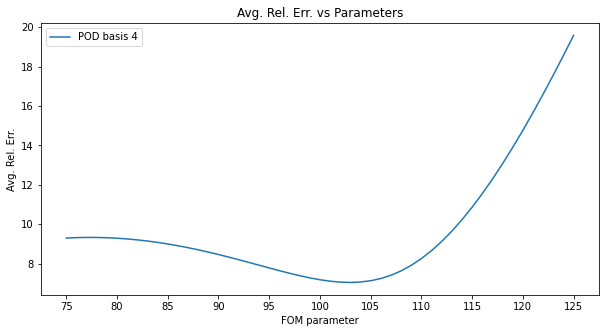

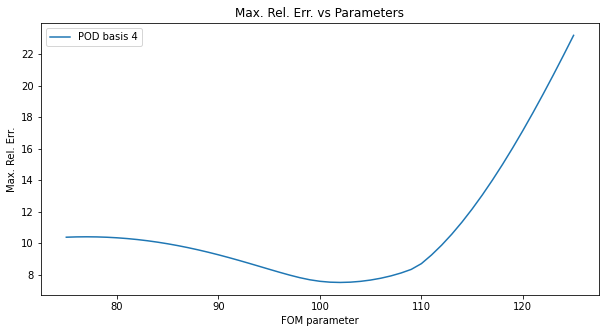

In [8]:
# with open(file=file_path_gappy_uniform_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:   
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex16_diffusion/ex16_POD_{}_uniform_avg_rel_err.png".format(int(num_basis[idx])))

# figure rel.err vs data points
plt.figure(figsize=(10,5))
plt_inter=1
for i in idx:   
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex16_diffusion/ex16_POD_{}_uniform_max_rel_err.png".format(int(num_basis[idx])))

In [9]:
print(num_basis)
print(FOM_parameters)

[3 4 5 6]
[ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]


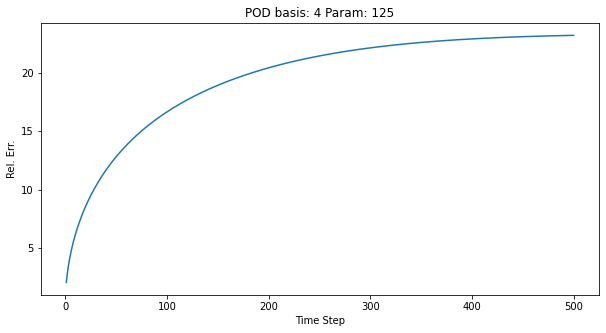

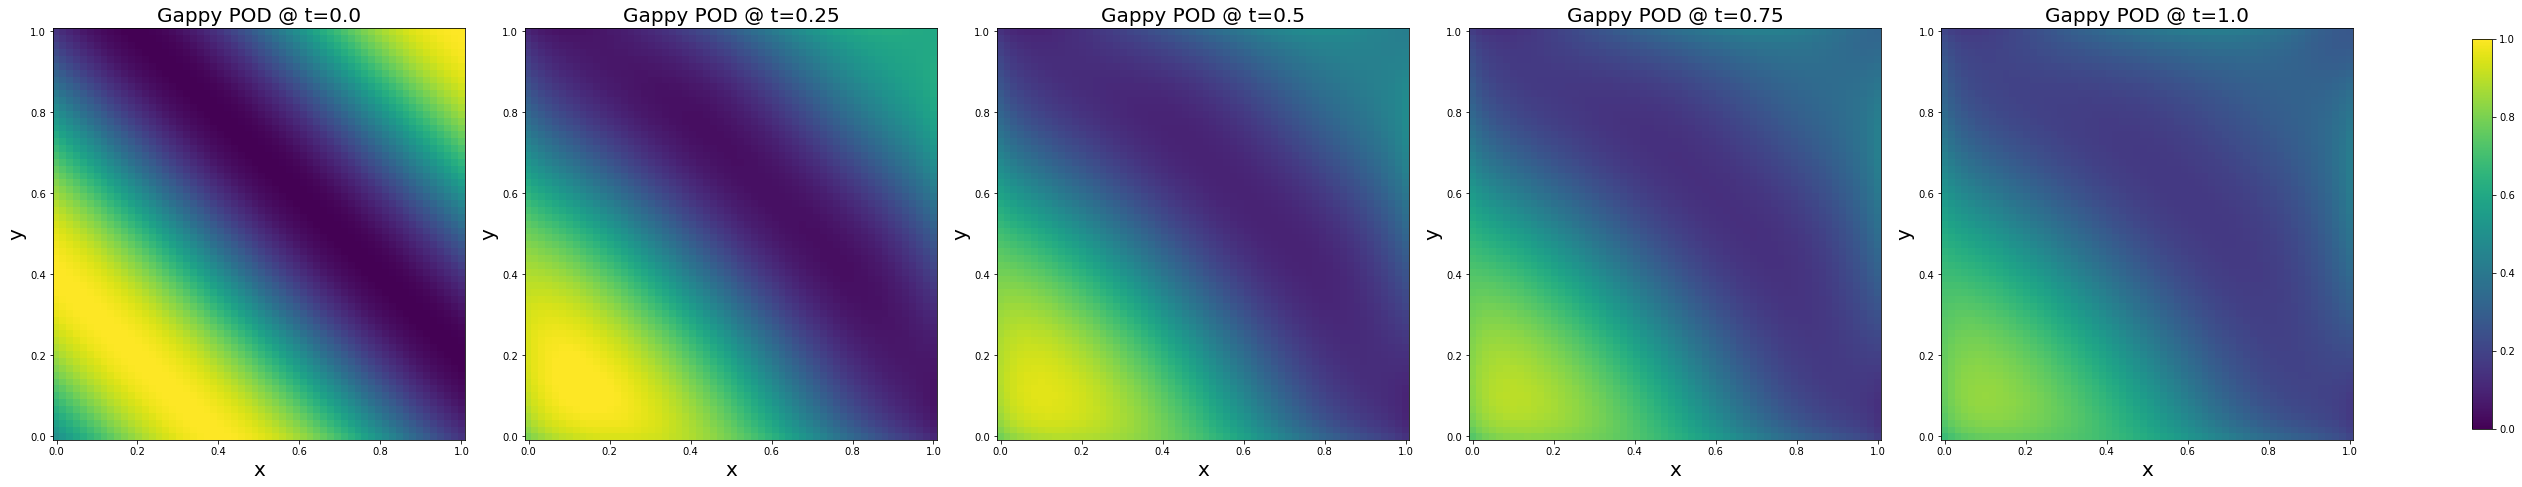

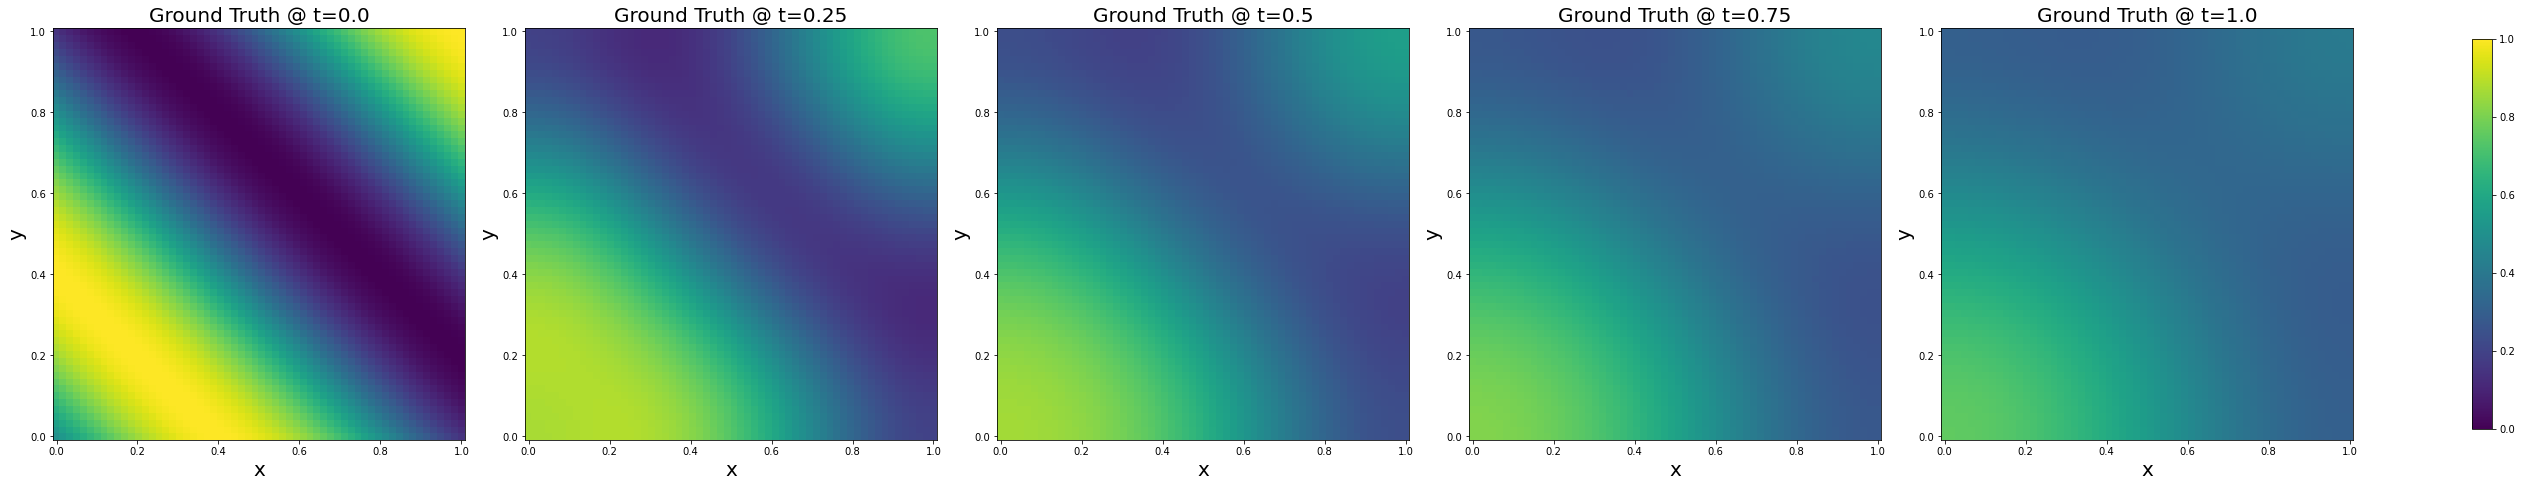

In [10]:
# figure rel.err vs at given param and POD basis
i=1;j=-1
POD_basis=num_basis[i]                 
param=FOM_parameters[j]

u_gappyPOD=results['solution'][i,j]

ex = np.load('../__data/ex16_diffusion/ex16_interp_{}.npz'.format(param), allow_pickle = True)
ex = ex.f.arr_0
u_full = ex.reshape(nt+1,-1)

plt.figure(figsize=(10,5))
plt.plot(np.arange(1,nt+1),results['rel_err'][i,j,1:].flatten())
plt.xlabel('Time Step')
plt.ylabel('Rel. Err.')
plt.title("POD basis: {} Param: {}".format(POD_basis,param))
plt.show()

# plot original data
vmin=0; vmax=1
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)*i].reshape(ny,nx),vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Gappy POD @ t={}'.format(int(nt/4)*i*dt),fontsize=20)

fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("../__result/ex16_diffusion/ex16_POD_{}_SOL.png".format(POD_basis))

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*i].reshape(ny,nx),vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Ground Truth @ t={}'.format(int(nt/4)*i*dt),fontsize=20)

fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("../__result/ex16_diffusion/ex16_ground_truth.png")